In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.Thomas_Algo_new import ThomasAlgorithm,create_tridiagonal
from sympy import *

In [2]:
def create_matrix_2(y,x,**kwargs):  # implicit
    args=kwargs['args']
    #alpha=args[0]
    
    Nx=len(x)
    dx=x[1]-x[0]
    a=np.zeros(len(x))
    b=np.zeros(len(x))
    c=np.zeros(len(x))
    d=np.zeros(len(x))
    for n in range(1,Nx-1,1):
        a[n]=-alpha
        b[n]=(1+2*alpha)
        c[n]=-alpha
        d[n]=y[n] #dx**2*f(x[n]) #y[n]
        
    return a,b,c,d

In [3]:
def CrankNicholsan(y,x,**kwargs):
    args=kwargs['args']
    #alpha=args[0]
    
    Nx=len(x)
    dx=x[1]-x[0]
    a=np.zeros(len(x))
    b=np.zeros(len(x))
    c=np.zeros(len(x))
    d=np.zeros(len(x))
    for n in range(1,Nx-1,1):
        a[n]=-alpha/2
        b[n]=1+alpha
        c[n]=-alpha/2
        d[n]= y[n]*(1-alpha)+0.5*alpha*y[n+1]+0.5*alpha*y[n-1] #dx**2*f(x[n]) #y[n]
        
    return a,b,c,d

In [4]:
def diffusion_explicit(y,x,**kwargs):
    args=kwargs['args']
    #alpha=args[0]
    
    Nx=len(x)
    dx=x[1]-x[0]
    a=np.zeros(len(x))
    b=np.zeros(len(x))
    c=np.zeros(len(x))
    d=np.zeros(len(x))
    for n in range(1,Nx-1,1):
        a[n]=0
        b[n]=1
        c[n]=0
        d[n]= alpha*y[n+1]+(1-2*alpha)*y[n]+alpha*y[n-1] #dx**2*f(x[n]) #y[n]
        
    return a,b,c,d

In [5]:
Nx=100
xmax=10
xmin=0
x =np.linspace(0,xmax-xmin,Nx)
t =np.linspace(0,1,1001)  # As we increase dt, t_ana(t=lasttime) go near and near to the t=last time .
sol =np.zeros((len(t),len(x)))
sol[0] =0
sol[0,:] =np.sin(3*np.pi*x/xmax-xmin)


sol_CN =np.zeros((len(t),len(x)))
sol_CN[0] =0
sol_CN[0,:] =np.sin(3*np.pi*x/xmax-xmin)
D=1 # if we increase D, the graph becomes parallel to X-axis (homogenization in diffusion)

sol_exp =np.zeros((len(t),len(x)))
sol_exp[0] =0
sol_exp[0,:] =np.sin(3*np.pi*x/xmax-xmin)

dx=x[1]-x[0]
dt=t[1]-t[0]

alpha=D*dt/(dx**2)
for time in range(1,len(t),1):
    sol[time]= ThomasAlgorithm(create_matrix_2,sol[time-1,:],x,args=(alpha,),Left='Dirichlet',Right='Dirichlet')
    sol_CN[time]=ThomasAlgorithm(CrankNicholsan,sol_CN[time-1,:],x,args=(alpha,),Left='Dirichlet',Right='Dirichlet')
    sol_exp[time]=ThomasAlgorithm(diffusion_explicit,sol_exp[time-1,:],x,args=(alpha,),Left='Dirichlet',Right='Dirichlet')

In [6]:
ana=np.zeros((len(t),len(x)))
for time in range(1,len(t),1):
    ana[time]=np.sin(3*np.pi*x/(xmax-xmin))*np.exp(-D*9*np.pi**2*t[time]/((xmax-xmin)*(xmax-xmin)))          

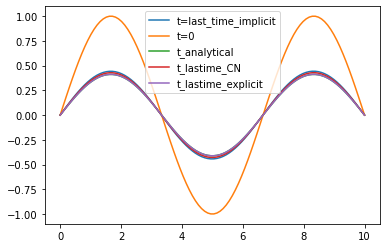

In [7]:
plt.plot(x,sol[-1,:],label='t=last_time_implicit')
plt.plot(x,sol[0,:],label='t=0')
plt.plot(x,ana[-1,:],label='t_analytical')
plt.plot(x,sol_CN[-1,:],label='t_lastime_CN')
plt.plot(x,sol_exp[-1,:],label='t_lastime_explicit')
plt.legend()
plt.show()

In [8]:
#plt.plot(t,sol[:,1],label='t=last_time')